
---

## Contenido del Notebook
1. Configuración inicial e importación de librerías
2. Carga del dataset
3. Inspección y limpieza de datos
4. Análisis Exploratorio de Datos (EDA)
5. Preparación de datos para Machine Learning
6. Entrenamiento del modelo (SVM)
7. Evaluación y métricas
8. Exportación de resultados

---
## Configuración Inicial e Importación de Librerías

In [1]:
# Librerías básicas para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Librerías de Machine Learning - Sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)

# Suprimir warnings para claridad visual
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas exitosamente")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de NumPy: {np.__version__}")

✅ Librerías importadas exitosamente
Versión de Pandas: 2.2.2
Versión de NumPy: 2.0.2


---
## Carga del Dataset

Existen **tres métodos principales** para cargar el dataset en Google Colab:

### Método 1: Desde Google Drive (Recomendado)
### Método 2: Descarga directa desde URL
### Método 3: Usando Kaggle API

**Usaremos el Método 2 (descarga directa) para facilitar la ejecución**

In [5]:
# MÉTODO 1: Cargar desde Google Drive (descomenta si prefieres este método)
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/2025-II/COMPUTACION CUANTICA/Expo/archive/WineQT.csv')

print("Dataset cargado exitosamente\n")
print("Primeras 5 filas del dataset:")
df.head()

Mounted at /content/drive
✅ Dataset cargado exitosamente

📊 Primeras 5 filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


---
## Inspección y Limpieza de Datos

Revisaremos:
- Dimensiones del dataset
- Tipos de datos de cada columna
- Valores nulos o faltantes
- Estadísticas descriptivas
- Duplicados

In [30]:
# 3.1 Información general del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print(f"\nDimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nColumnas en el dataset:")
print(df.columns.tolist())
df.info()

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 1143 filas × 12 columnas

Columnas en el dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 1

In [31]:
# 3.2 Verificar valores nulos
print("="*60)
print(" ANÁLISIS DE VALORES NULOS")
print("="*60)

nulos = df.isnull().sum()
porcentaje_nulos = (nulos / len(df)) * 100

resumen_nulos = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje (%)': porcentaje_nulos
})

print(resumen_nulos[resumen_nulos['Valores Nulos'] > 0])

if nulos.sum() == 0:
    print("\n No se encontraron valores nulos en el dataset")
else:
    print(f"\n Total de valores nulos: {nulos.sum()}")

 ANÁLISIS DE VALORES NULOS
Empty DataFrame
Columns: [Valores Nulos, Porcentaje (%)]
Index: []

 No se encontraron valores nulos en el dataset


In [33]:
# 3.3 Verificar duplicados

print("ANÁLISIS DE DUPLICADOS")
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

if duplicados > 0:
    print(f"Porcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")
    print("\n Eliminando duplicados...")
    df = df.drop_duplicates()
    print(f"Dataset limpio. Nueva dimensión: {df.shape}")
else:
    print("\ No se encontraron filas duplicadas")

ANÁLISIS DE DUPLICADOS

Número de filas duplicadas: 0
\ No se encontraron filas duplicadas


In [36]:
# 3.4 Estadísticas descriptivas
print(" ESTADÍSTICAS DESCRIPTIVAS")

df.describe().T

 ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1018.0,8.288507,1.741324,4.60000,7.100000,7.900000,9.100000,15.90000
volatile acidity,1018.0,0.533541,0.183167,0.12000,0.390000,0.520000,0.645000,1.58000
citric acid,1018.0,0.268802,0.196229,0.00000,0.090000,0.250000,0.420000,1.00000
residual sugar,1018.0,2.524411,1.314850,0.90000,1.900000,2.200000,2.600000,15.50000
chlorides,1018.0,0.087187,0.048506,0.01200,0.070000,0.079000,0.090000,0.61100
free sulfur dioxide,1018.0,15.648821,10.176525,1.00000,7.000000,13.000000,21.000000,68.00000
total sulfur dioxide,1018.0,46.325639,33.123533,6.00000,21.000000,38.000000,62.000000,289.00000
density,1018.0,0.996700,0.001916,0.99007,0.995572,0.996665,0.997827,1.00369
pH,1018.0,3.311503,0.157775,2.74000,3.210000,3.310000,3.400000,4.01000
sulphates,1018.0,0.656817,0.167542,0.33000,0.550000,0.620000,0.720000,2.00000


In [37]:
# 3.5 Distribución de la variable objetivo (quality)

print("ANÁLISIS DE LA VARIABLE OBJETIVO: QUALITY")


print("\nDistribución de valores:")
distribucion = df['quality'].value_counts().sort_index()
print(distribucion)

print("\nPorcentaje por categoría:")
print((df['quality'].value_counts(normalize=True).sort_index() * 100).round(2))

print(f"\nRango de calidad: {df['quality'].min()} - {df['quality'].max()}")
print(f"Calidad promedio: {df['quality'].mean():.2f}")
print(f"Mediana de calidad: {df['quality'].median()}")

ANÁLISIS DE LA VARIABLE OBJETIVO: QUALITY

Distribución de valores:
quality
3      6
4     33
5    433
6    409
7    122
8     15
Name: count, dtype: int64

Porcentaje por categoría:
quality
3     0.59
4     3.24
5    42.53
6    40.18
7    11.98
8     1.47
Name: proportion, dtype: float64

Rango de calidad: 3 - 8
Calidad promedio: 5.64
Mediana de calidad: 6.0


---
## 4️⃣ Análisis Exploratorio de Datos (EDA)

Realizaremos visualizaciones comprehensivas para entender:
- Distribución de cada característica
- Relaciones entre variables
- Correlaciones
- Outliers y valores atípicos

 Generando histogramas de todas las características...



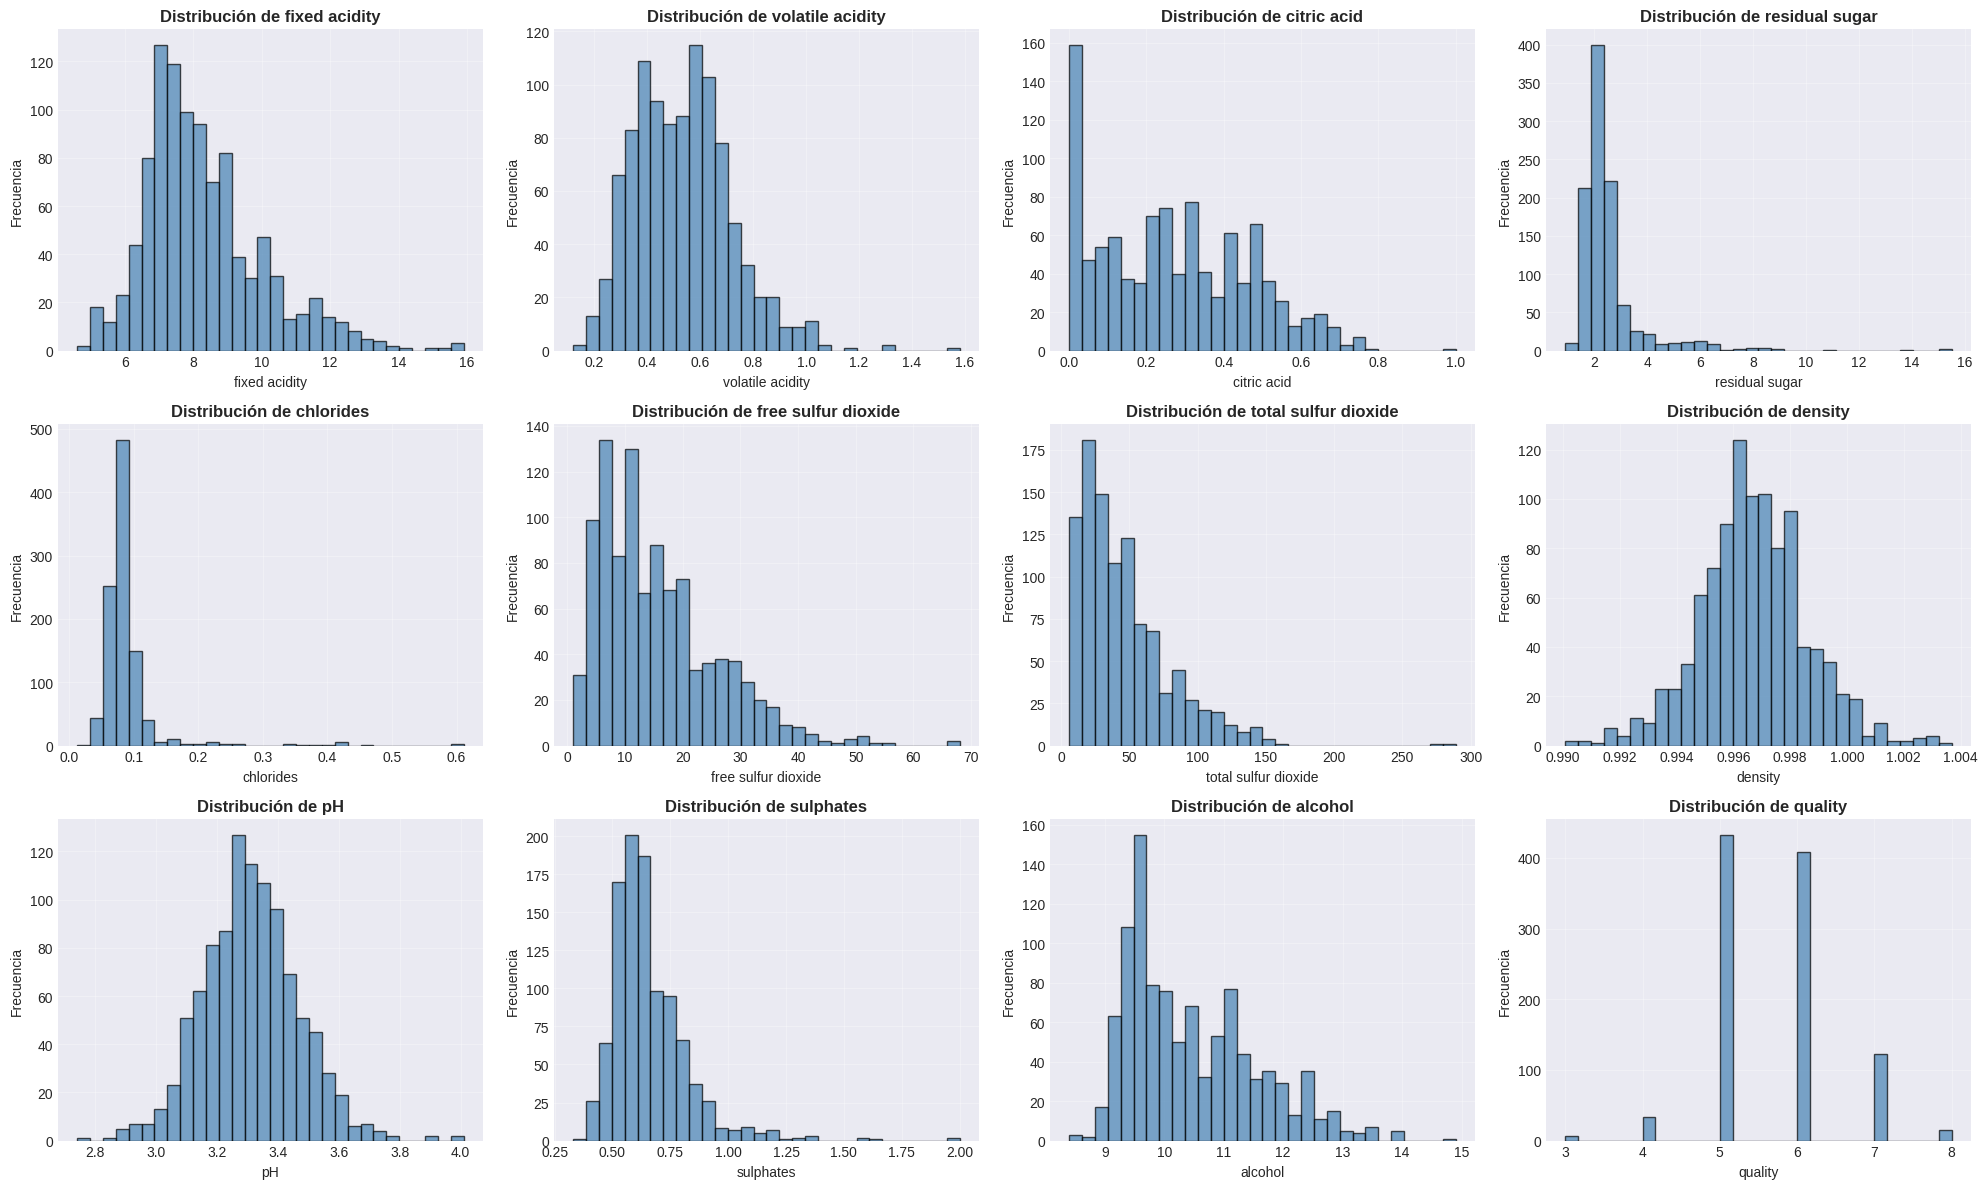

Histogramas generados y guardados como 'histogramas_caracteristicas.png'


In [38]:
# 4.1 Histogramas de todas las características
print(" Generando histogramas de todas las características...\n")

# Obtener todas las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar 'Id' si existe (no es relevante para el análisis)
if 'Id' in columnas_numericas:
    columnas_numericas.remove('Id')

# Crear subplots para todos los histogramas
n_cols = 4
n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(columnas_numericas):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

# Ocultar ejes vacíos si los hay
for idx in range(len(columnas_numericas), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('histogramas_caracteristicas.png', dpi=300, bbox_inches='tight')
plt.show()

print("Histogramas generados y guardados como 'histogramas_caracteristicas.png'")

Generando countplot de Quality...



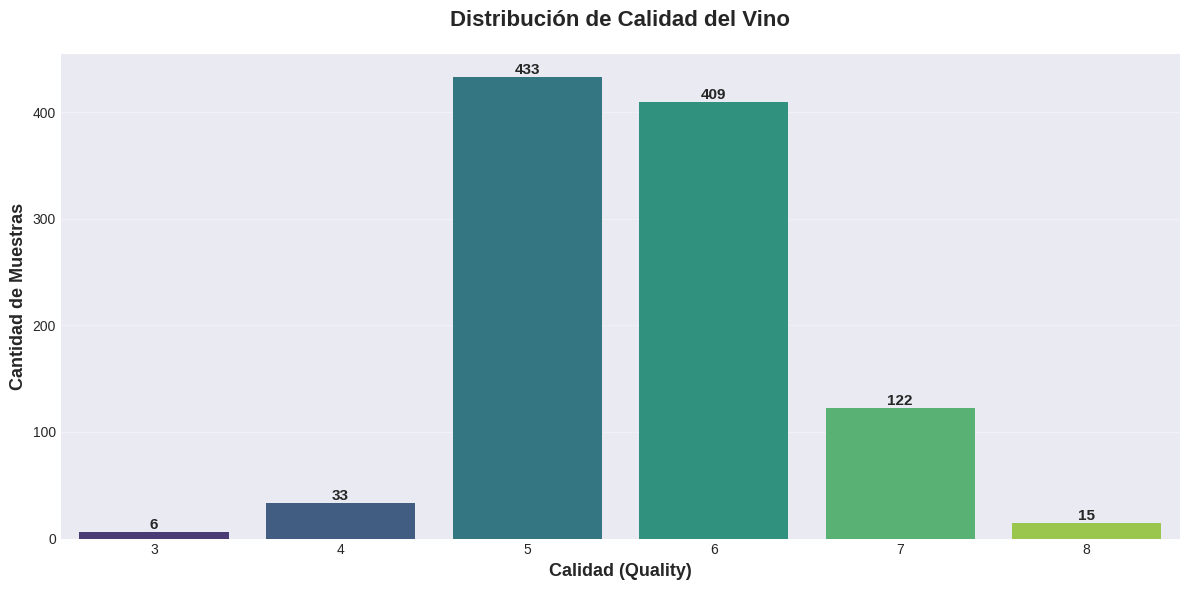

Countplot generado y guardado como 'countplot_quality.png'

Observación: El dataset muestra un desbalance de clases.
   Las calidades 5, 6 y 7 son las más frecuentes.


In [40]:
# 4.2 Countplot de la variable objetivo (quality)
print("Generando countplot de Quality...\n")

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='quality', palette='viridis')

# Añadir valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fontsize=11, fontweight='bold')

plt.title('Distribución de Calidad del Vino', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Calidad (Quality)', fontsize=13, fontweight='bold')
plt.ylabel('Cantidad de Muestras', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('countplot_quality.png', dpi=300, bbox_inches='tight')
plt.show()

print("Countplot generado y guardado como 'countplot_quality.png'")
print("\nObservación: El dataset muestra un desbalance de clases.")
print("   Las calidades 5, 6 y 7 son las más frecuentes.")

Generando heatmap de correlación...



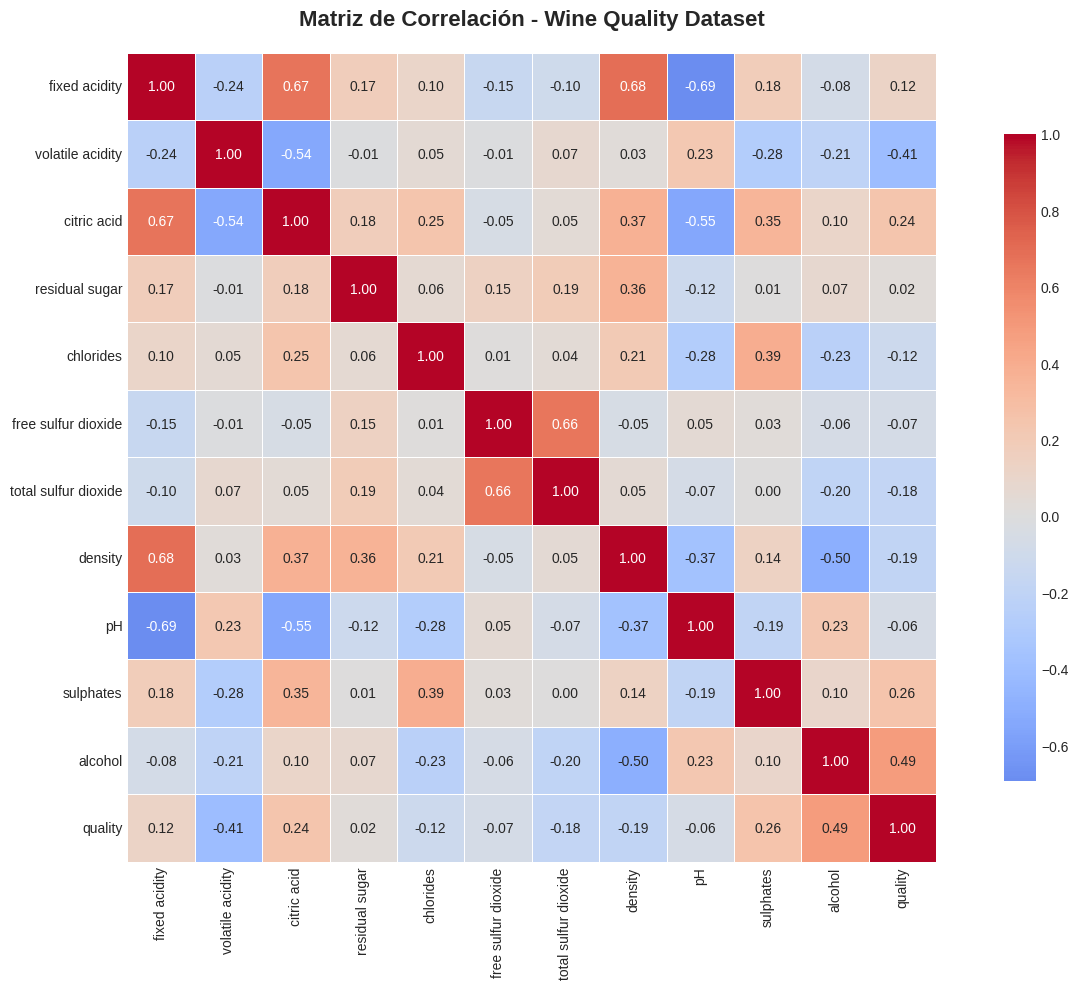

Heatmap generado y guardado como 'heatmap_correlacion.png'

Correlaciones con la variable objetivo (quality):
quality                 1.000000
alcohol                 0.485953
sulphates               0.257519
citric acid             0.241565
fixed acidity           0.115826
residual sugar          0.022718
pH                     -0.057592
free sulfur dioxide    -0.071083
chlorides              -0.122214
total sulfur dioxide   -0.182214
density                -0.185187
volatile acidity       -0.409340
Name: quality, dtype: float64


In [43]:
# 4.3 Heatmap de correlación
print("Generando heatmap de correlación...\n")

# Calcular matriz de correlación (excluyendo 'Id' si existe)
columnas_para_correlacion = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Id']
correlation_matrix = df[columnas_para_correlacion].corr()

# Crear heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Matriz de Correlación - Wine Quality Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('heatmap_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("Heatmap generado y guardado como 'heatmap_correlacion.png'")

# Mostrar las correlaciones más fuertes con 'quality'
print("\nCorrelaciones con la variable objetivo (quality):")
correlaciones_quality = correlation_matrix['quality'].sort_values(ascending=False)
print(correlaciones_quality)

Generando boxplots de características principales...



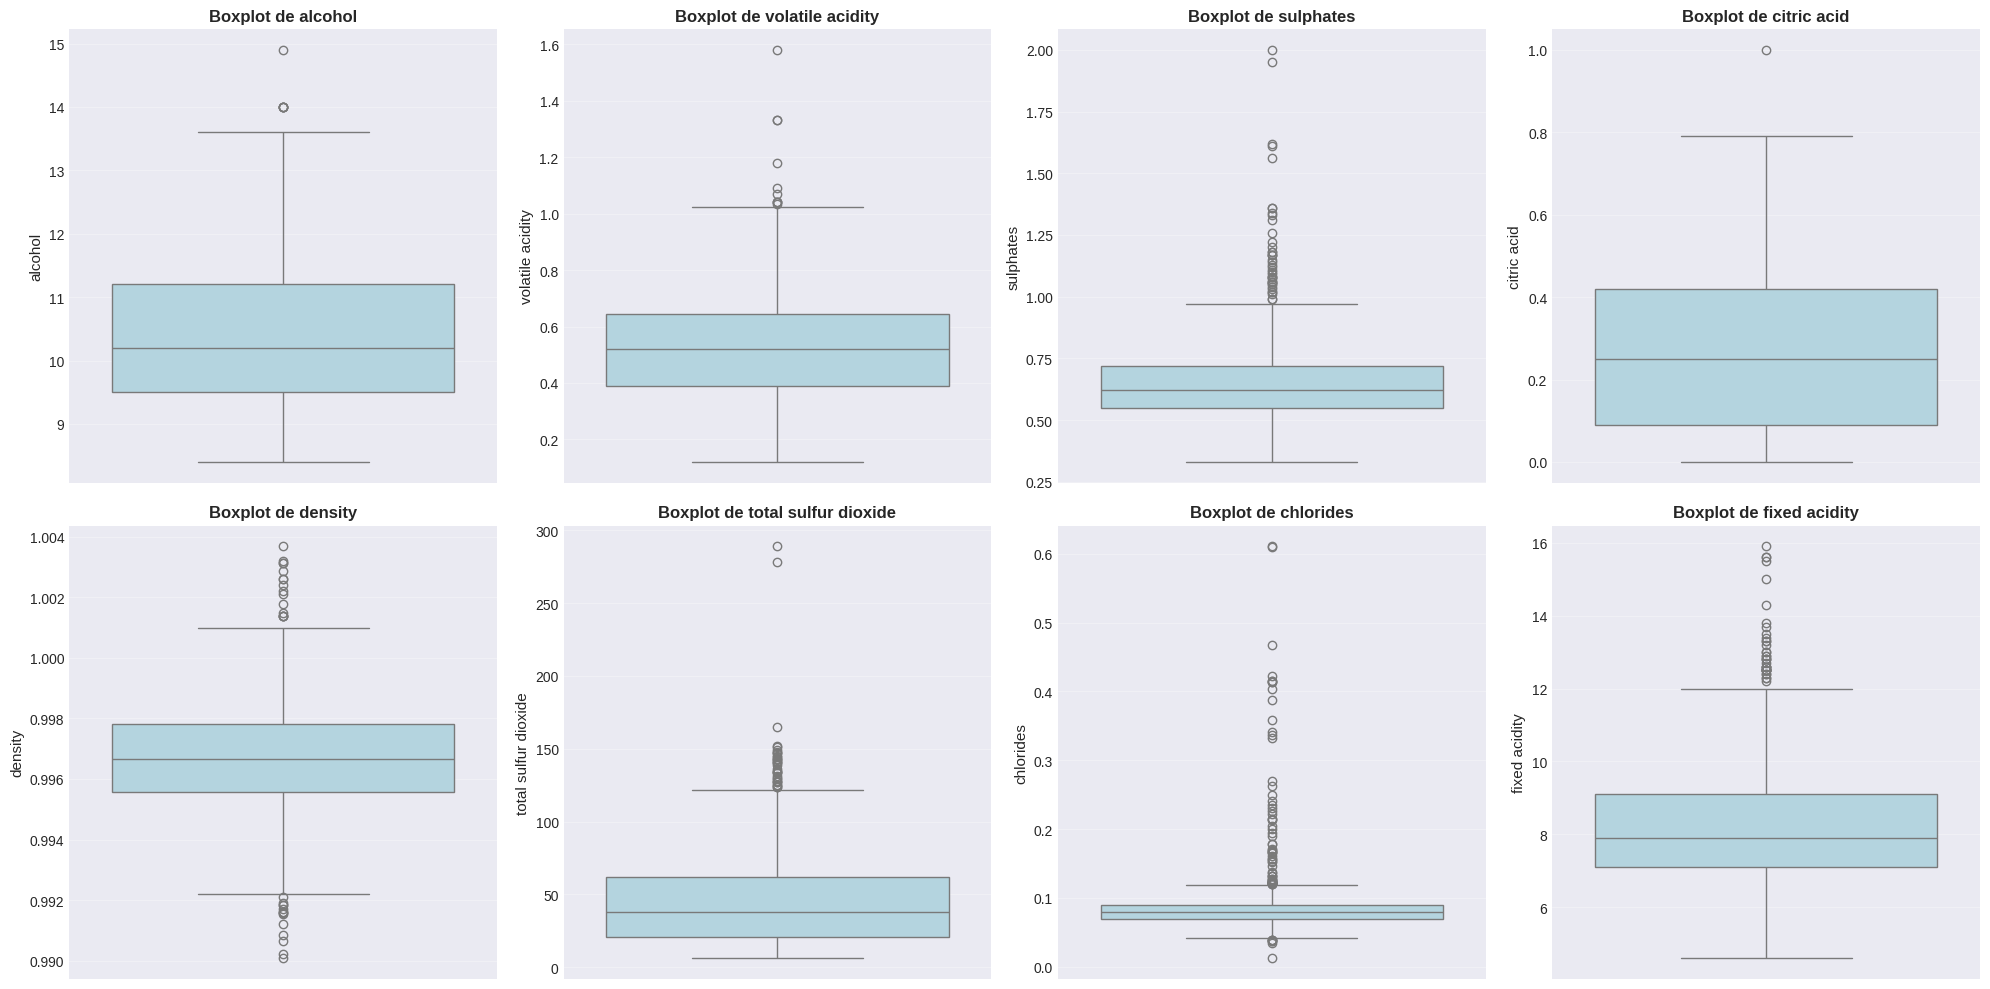

Boxplots generados y guardados como 'boxplots_caracteristicas.png'

Los boxplots permiten identificar valores atípicos (outliers) en cada característica.


In [44]:
# 4.4 Boxplots de las características principales
print("Generando boxplots de características principales...\n")

# Seleccionar las características más correlacionadas con quality
top_features = correlation_matrix['quality'].abs().sort_values(ascending=False)[1:9].index.tolist()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(top_features):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('boxplots_caracteristicas.png', dpi=300, bbox_inches='tight')
plt.show()

print("Boxplots generados y guardados como 'boxplots_caracteristicas.png'")
print("\nLos boxplots permiten identificar valores atípicos (outliers) en cada característica.")

Generando pairplot (puede tomar unos segundos)...



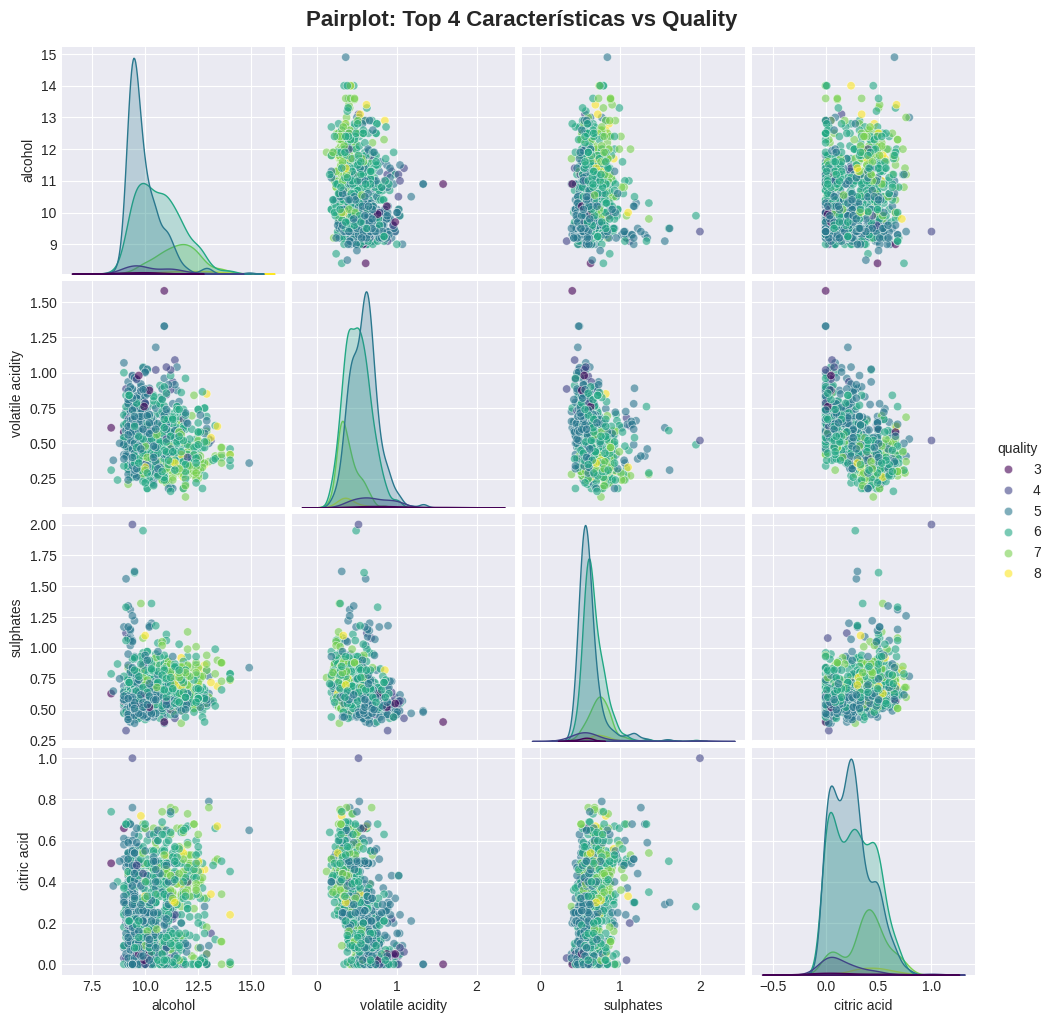

Pairplot generado y guardado como 'pairplot_top_features.png'


In [45]:
# 4.5 Pairplot de características más importantes vs quality
print("Generando pairplot (puede tomar unos segundos)...\n")

# Seleccionar las 4 características más correlacionadas + quality
top_4_features = correlation_matrix['quality'].abs().sort_values(ascending=False)[1:5].index.tolist()
columnas_pairplot = top_4_features + ['quality']

pairplot = sns.pairplot(
    df[columnas_pairplot],
    hue='quality',
    palette='viridis',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)

pairplot.fig.suptitle('Pairplot: Top 4 Características vs Quality', y=1.02, fontsize=16, fontweight='bold')
plt.savefig('pairplot_top_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pairplot generado y guardado como 'pairplot_top_features.png'")

---
## 5️⃣ Preparación de Datos para Machine Learning

Pasos:
1. Separar características (X) y variable objetivo (y)
2. División en conjunto de entrenamiento y prueba
3. Normalización de características usando StandardScaler

In [46]:
# 5.1 Separar características (X) y variable objetivo (y)

print("🔧 PREPARACIÓN DE DATOS")

# Eliminar columna 'Id' si existe (no aporta información predictiva)
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("\nColumna 'Id' eliminada del dataset")

# Separar features (X) y target (y)
X = df.drop('quality', axis=1)
y = df['quality']

print(f" Dimensiones de X (features): {X.shape}")
print(f"Dimensiones de y (target): {y.shape}")
print(f" Features utilizadas: {X.columns.tolist()}")

🔧 PREPARACIÓN DE DATOS
 Dimensiones de X (features): (1018, 11)
Dimensiones de y (target): (1018,)
 Features utilizadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [47]:
# 5.2 División en conjunto de entrenamiento y prueba

print("DIVISIÓN DE DATOS: TRAIN / TEST")


# Dividir datos: 80% entrenamiento, 20% prueba
# random_state=42 para reproducibilidad
# stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"División completada:")
print(f"  Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"  Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"  Proporción: {(X_train.shape[0]/len(df))*100:.1f}% train / {(X_test.shape[0]/len(df))*100:.1f}% test")

# Verificar distribución de clases en train y test
print("\n Distribución de calidad en conjunto de entrenamiento:")
print(y_train.value_counts().sort_index())

print("\n Distribución de calidad en conjunto de prueba:")
print(y_test.value_counts().sort_index())

DIVISIÓN DE DATOS: TRAIN / TEST
División completada:
  Conjunto de entrenamiento: 814 muestras
  Conjunto de prueba: 204 muestras
  Proporción: 80.0% train / 20.0% test

 Distribución de calidad en conjunto de entrenamiento:
quality
3      5
4     26
5    346
6    327
7     98
8     12
Name: count, dtype: int64

 Distribución de calidad en conjunto de prueba:
quality
3     1
4     7
5    87
6    82
7    24
8     3
Name: count, dtype: int64


In [50]:
# 5.3 Normalización de características

print("NORMALIZACIÓN DE CARACTERÍSTICAS")


print("\n ¿Por qué normalizar?")
print("   • Los algoritmos como SVM son sensibles a la escala de las variables")
print("   • StandardScaler estandariza las características: media=0, desviación estándar=1")
print("   • Mejora la convergencia y el rendimiento del modelo\n")

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler solo con datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar datos de prueba usando el mismo scaler
# IMPORTANTE: No usar fit_transform en test para evitar data leakage
X_test_scaled = scaler.transform(X_test)

print("Normalización completada")
print(f"\nEjemplo de valores antes y después de normalización:")
print(f"   Característica: {X.columns[0]}")
print(f"   Antes - Media: {X_train.iloc[:, 0].mean():.3f}, Std: {X_train.iloc[:, 0].std():.3f}")
print(f"   Después - Media: {X_train_scaled[:, 0].mean():.3f}, Std: {X_train_scaled[:, 0].std():.3f}")

NORMALIZACIÓN DE CARACTERÍSTICAS

 ¿Por qué normalizar?
   • Los algoritmos como SVM son sensibles a la escala de las variables
   • StandardScaler estandariza las características: media=0, desviación estándar=1
   • Mejora la convergencia y el rendimiento del modelo

Normalización completada

Ejemplo de valores antes y después de normalización:
   Característica: fixed acidity
   Antes - Media: 8.307, Std: 1.716
   Después - Media: 0.000, Std: 1.000


---
## Entrenamiento del Modelo: Support Vector Machine (SVM)

### ¿Por qué SVM?

**Support Vector Machine (Máquina de Vectores de Soporte)** es un algoritmo de clasificación supervisada que funciona encontrando el hiperplano óptimo que separa las clases.

**Ventajas para este dataset:**
1. **Efectivo en espacios de alta dimensionalidad** - Nuestro dataset tiene 11 características
2. **Robusto con datos pequeños/medianos** - ~1,600 muestras es ideal para SVM
3. **Maneja bien clasificación multiclase** - Tenemos 6 clases de calidad (3-8)
4. **Kernel trick** - Puede capturar relaciones no lineales entre variables
5. **Menos propenso a overfitting** - Gracias a la regularización

**Configuración del modelo:**
- `kernel='rbf'`: Kernel Gaussiano para relaciones no lineales
- `C=1.0`: Parámetro de regularización (se puede optimizar)
- `gamma='scale'`: Coeficiente del kernel
- `random_state=42`: Reproducibilidad

In [51]:
# 6.1 Crear y entrenar el modelo SVM

print("ENTRENAMIENTO DEL MODELO SVM")


# Crear el modelo SVM con kernel RBF (Radial Basis Function)
svm_model = SVC(
    kernel='rbf',      # Kernel Gaussiano para capturar relaciones no lineales
    C=1.0,             # Parámetro de regularización
    gamma='scale',     # Coeficiente del kernel
    random_state=42,   # Semilla para reproducibilidad
    verbose=False      # No mostrar detalles durante entrenamiento
)

print("\nConfiguración del modelo SVM:")
print(f"   Kernel: {svm_model.kernel}")
print(f"   C (regularización): {svm_model.C}")
print(f"   Gamma: {svm_model.gamma}")

print("\n Entrenando modelo SVM...")
import time
inicio = time.time()

# Entrenar el modelo con datos de entrenamiento escalados
svm_model.fit(X_train_scaled, y_train)

tiempo_entrenamiento = time.time() - inicio

print(f"\n Modelo entrenado exitosamente")
print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
print(f"\nVectores de soporte por clase:")
print(svm_model.n_support_)

ENTRENAMIENTO DEL MODELO SVM

Configuración del modelo SVM:
   Kernel: rbf
   C (regularización): 1.0
   Gamma: scale

 Entrenando modelo SVM...

 Modelo entrenado exitosamente
Tiempo de entrenamiento: 0.04 segundos

Vectores de soporte por clase:
[  5  26 260 300  96  12]


In [52]:
# 6.2 Realizar predicciones
print("\n" + "="*60)
print("REALIZANDO PREDICCIONES")
print("="*60)

# Predicciones en conjunto de entrenamiento
y_train_pred = svm_model.predict(X_train_scaled)

# Predicciones en conjunto de prueba
y_test_pred = svm_model.predict(X_test_scaled)

print("\nPredicciones completadas")
print(f"\nEjemplo de predicciones vs valores reales (primeras 10 muestras de test):")

comparacion = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicción': y_test_pred[:10]
})
comparacion['Correcto'] = comparacion['Real'] == comparacion['Predicción']
print(comparacion)


REALIZANDO PREDICCIONES

Predicciones completadas

Ejemplo de predicciones vs valores reales (primeras 10 muestras de test):
   Real  Predicción  Correcto
0     5           6     False
1     6           5     False
2     4           5     False
3     6           6      True
4     5           5      True
5     4           5     False
6     6           6      True
7     5           6     False
8     5           5      True
9     6           5     False


---
## 7️⃣ Evaluación del Modelo y Métricas

Evaluaremos el rendimiento usando:
- **Accuracy**: Porcentaje de predicciones correctas
- **Precision**: De los predichos como positivos, cuántos son realmente positivos
- **Recall**: De los positivos reales, cuántos fueron detectados
- **F1-Score**: Media armónica entre Precision y Recall
- **Confusion Matrix**: Matriz de confusión para ver errores por clase

In [54]:
# 7.1 Calcular métricas de rendimiento

print("MÉTRICAS DE RENDIMIENTO DEL MODELO")


# Accuracy en entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nACCURACY (Exactitud):")
print(f"   Entrenamiento: {train_accuracy*100:.2f}%")
print(f"   Prueba: {test_accuracy*100:.2f}%")

# Calcular diferencia para detectar overfitting
diferencia = (train_accuracy - test_accuracy) * 100
if diferencia > 5:
    print(f"   Diferencia: {diferencia:.2f}% - Posible overfitting")
else:
    print(f"   Diferencia: {diferencia:.2f}% - Buen balance")

# Classification Report detallado
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN (CONJUNTO DE PRUEBA)")
print("="*60)
print(classification_report(y_test, y_test_pred))

# Métricas promedio
precision_macro = precision_score(y_test, y_test_pred, average='macro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

print("\n MÉTRICAS PROMEDIO (Macro):")
print(f"   Precision: {precision_macro*100:.2f}%")
print(f"   Recall: {recall_macro*100:.2f}%")
print(f"   F1-Score: {f1_macro*100:.2f}%")

MÉTRICAS DE RENDIMIENTO DEL MODELO

ACCURACY (Exactitud):
   Entrenamiento: 67.69%
   Prueba: 60.29%
   Diferencia: 7.40% - Posible overfitting

REPORTE DE CLASIFICACIÓN (CONJUNTO DE PRUEBA)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.75      0.70        87
           6       0.56      0.60      0.58        82
           7       0.56      0.38      0.45        24
           8       0.00      0.00      0.00         3

    accuracy                           0.60       204
   macro avg       0.29      0.29      0.29       204
weighted avg       0.57      0.60      0.58       204


 MÉTRICAS PROMEDIO (Macro):
   Precision: 29.49%
   Recall: 28.66%
   F1-Score: 28.69%



Generando matriz de confusión...



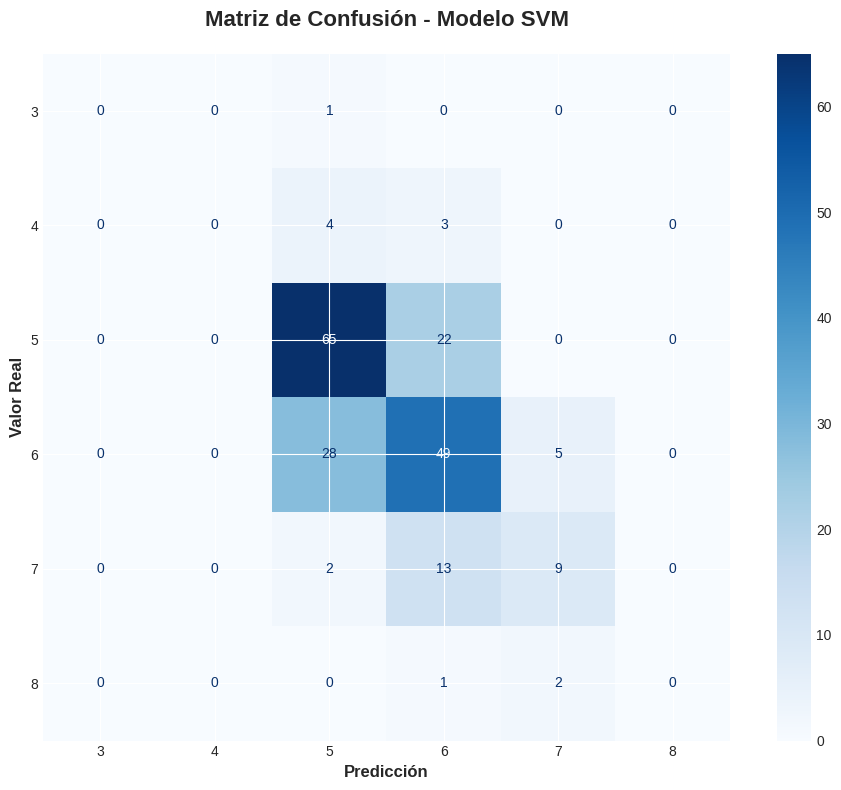

Matriz de confusión generada y guardada como 'confusion_matrix.png'

 Interpretación:
   • La diagonal principal muestra las predicciones correctas
   • Los valores fuera de la diagonal son errores de clasificación
   • Valores más altos en la diagonal = mejor rendimiento


In [56]:
# 7.2 Matriz de Confusión
print("\nGenerando matriz de confusión...\n")

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Visualizar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', ax=ax, values_format='d')

plt.title('Matriz de Confusión - Modelo SVM', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicción', fontsize=12, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Matriz de confusión generada y guardada como 'confusion_matrix.png'")
print("\n Interpretación:")
print("   • La diagonal principal muestra las predicciones correctas")
print("   • Los valores fuera de la diagonal son errores de clasificación")
print("   • Valores más altos en la diagonal = mejor rendimiento")


 Generando gráfico comparativo de métricas...



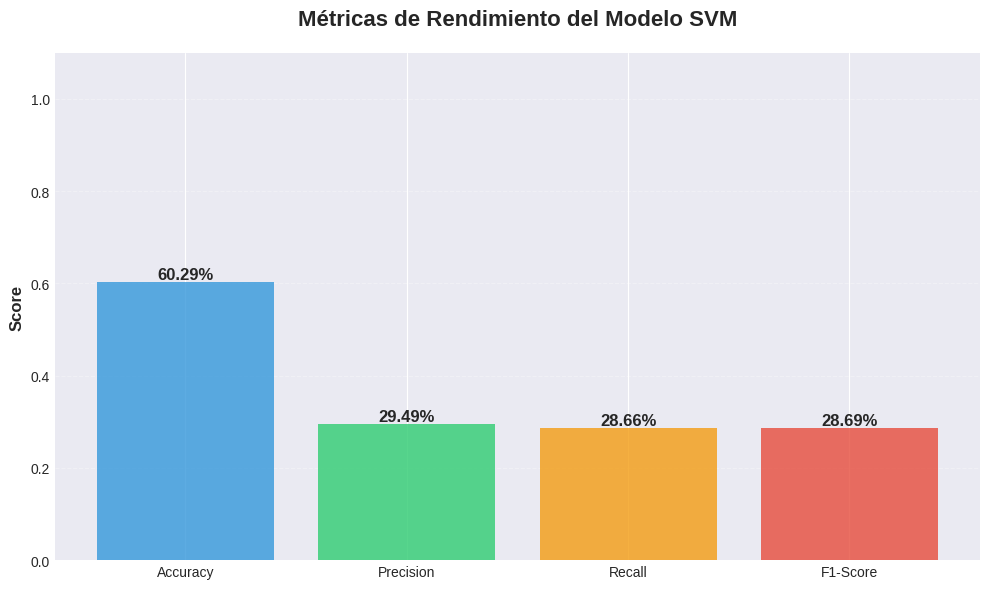

Gráfico de métricas generado y guardado como 'metricas_comparativas.png'


In [57]:
# 7.3 Gráfico de barras comparativo de métricas
print("\n Generando gráfico comparativo de métricas...\n")

# Preparar datos para el gráfico
metricas = {
    'Accuracy': test_accuracy,
    'Precision': precision_macro,
    'Recall': recall_macro,
    'F1-Score': f1_macro
}

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(metricas.keys(), metricas.values(), color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8)

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height*100:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Métricas de Rendimiento del Modelo SVM', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('metricas_comparativas.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico de métricas generado y guardado como 'metricas_comparativas.png'")

 VALIDACIÓN CRUZADA (5-FOLD)

Ejecutando validación cruzada (puede tomar tiempo)...

Validación cruzada completada

Scores por fold:
   Fold 1: 61.96%
   Fold 2: 64.42%
   Fold 3: 58.28%
   Fold 4: 61.35%
   Fold 5: 55.56%

Estadísticas de validación cruzada:
   Media: 60.31%
   Desviación estándar: 3.08%
   Mínimo: 55.56%
   Máximo: 64.42%


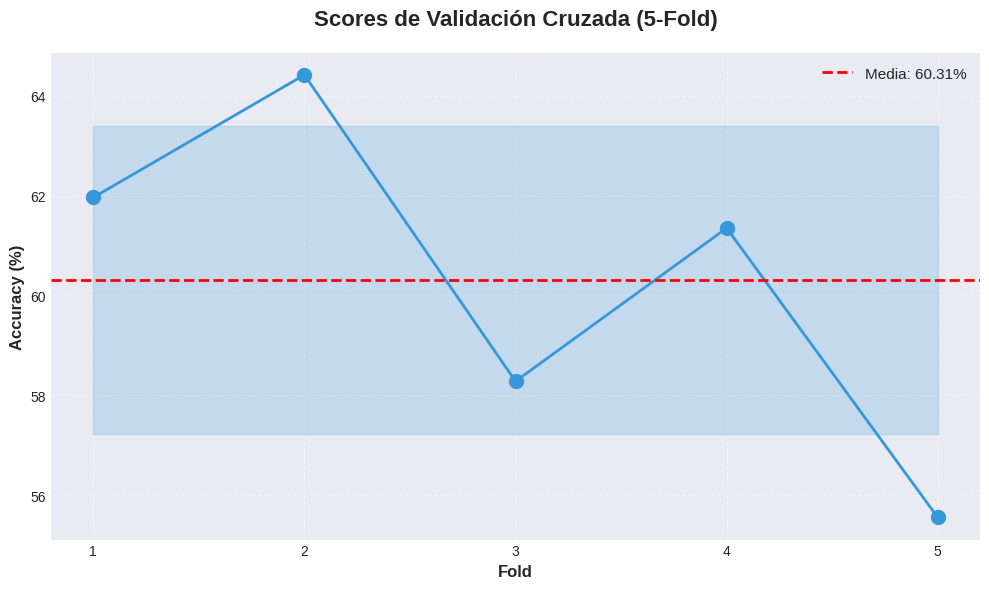


Gráfico de validación cruzada guardado como 'validacion_cruzada.png'


In [59]:
# 7.4 Validación Cruzada para confirmar robustez del modelo

print(" VALIDACIÓN CRUZADA (5-FOLD)")

print("\nEjecutando validación cruzada (puede tomar tiempo)...\n")

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(
    svm_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("Validación cruzada completada")
print(f"\nScores por fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"   Fold {i}: {score*100:.2f}%")

print(f"\nEstadísticas de validación cruzada:")
print(f"   Media: {cv_scores.mean()*100:.2f}%")
print(f"   Desviación estándar: {cv_scores.std()*100:.2f}%")
print(f"   Mínimo: {cv_scores.min()*100:.2f}%")
print(f"   Máximo: {cv_scores.max()*100:.2f}%")

# Visualizar scores de validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores * 100, marker='o', linestyle='-', linewidth=2, markersize=10, color='#3498db')
plt.axhline(y=cv_scores.mean()*100, color='red', linestyle='--', linewidth=2, label=f'Media: {cv_scores.mean()*100:.2f}%')
plt.fill_between(range(1, 6),
                 (cv_scores.mean() - cv_scores.std())*100,
                 (cv_scores.mean() + cv_scores.std())*100,
                 alpha=0.2, color='#3498db')

plt.title('Scores de Validación Cruzada (5-Fold)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('validacion_cruzada.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico de validación cruzada guardado como 'validacion_cruzada.png'")

---
## 8️⃣ Exportación de Resultados y Modelo

Guardaremos:
1. El modelo entrenado
2. El scaler utilizado
3. Resumen de resultados en CSV

In [60]:
# 8.1 Guardar el modelo y el scaler

print("GUARDANDO MODELO Y RESULTADOS")

import pickle

# Guardar modelo SVM
with open('svm_wine_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
print("\nModelo SVM guardado como 'svm_wine_model.pkl'")

# Guardar scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("Scaler guardado como 'scaler.pkl'")

print("\nPara usar el modelo en el futuro:")
print("   import pickle")
print("   model = pickle.load(open('svm_wine_model.pkl', 'rb'))")
print("   scaler = pickle.load(open('scaler.pkl', 'rb'))")

GUARDANDO MODELO Y RESULTADOS

Modelo SVM guardado como 'svm_wine_model.pkl'
Scaler guardado como 'scaler.pkl'

Para usar el modelo en el futuro:
   import pickle
   model = pickle.load(open('svm_wine_model.pkl', 'rb'))
   scaler = pickle.load(open('scaler.pkl', 'rb'))


In [61]:
# 8.2 Crear resumen de resultados
print("\nCreando resumen de resultados...\n")

# Crear DataFrame con resumen de métricas
resumen_metricas = pd.DataFrame({
    'Métrica': ['Accuracy (Train)', 'Accuracy (Test)', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'CV Mean', 'CV Std'],
    'Valor (%)': [
        train_accuracy * 100,
        test_accuracy * 100,
        precision_macro * 100,
        recall_macro * 100,
        f1_macro * 100,
        cv_scores.mean() * 100,
        cv_scores.std() * 100
    ]
})

# Guardar en CSV
resumen_metricas.to_csv('resumen_metricas.csv', index=False)
print("Resumen de métricas guardado como 'resumen_metricas.csv'")

# Mostrar resumen
print("\nRESUMEN DE MÉTRICAS:")
print(resumen_metricas.to_string(index=False))


Creando resumen de resultados...

Resumen de métricas guardado como 'resumen_metricas.csv'

RESUMEN DE MÉTRICAS:
          Métrica  Valor (%)
 Accuracy (Train)  67.690418
  Accuracy (Test)  60.294118
Precision (Macro)  29.488636
   Recall (Macro)  28.661457
 F1-Score (Macro)  28.694296
          CV Mean  60.313565
           CV Std   3.078945


In [62]:
# 8.3 Guardar predicciones para análisis posterior
print("\n📊 Guardando predicciones...\n")

# Crear DataFrame con predicciones
resultados_predicciones = pd.DataFrame({
    'Real': y_test.values,
    'Predicción': y_test_pred,
    'Correcto': y_test.values == y_test_pred
})

# Guardar predicciones
resultados_predicciones.to_csv('predicciones_test.csv', index=False)
print("Predicciones guardadas como 'predicciones_test.csv'")

# Estadísticas de predicciones
correctas = (y_test.values == y_test_pred).sum()
incorrectas = len(y_test) - correctas

print(f"\nEstadísticas de predicciones:")
print(f"  Correctas: {correctas} ({(correctas/len(y_test))*100:.2f}%)")
print(f"  Incorrectas: {incorrectas} ({(incorrectas/len(y_test))*100:.2f}%)")


📊 Guardando predicciones...

Predicciones guardadas como 'predicciones_test.csv'

Estadísticas de predicciones:
  Correctas: 123 (60.29%)
  Incorrectas: 81 (39.71%)


---
## 📊 Resumen Final y Conclusiones

In [64]:
# Resumen ejecutivo del proyecto

print(" RESUMEN EJECUTIVO DEL PROYECTO")

print(f"""
DATASET:
   • Nombre: Wine Quality Dataset (Kaggle)
   • Total de muestras: {len(df)}
   • Características: {X.shape[1]}
   • Clases de calidad: {sorted(y.unique())}
   • División: {X_train.shape[0]} train / {X_test.shape[0]} test

MODELO:
   • Algoritmo: Support Vector Machine (SVM)
   • Kernel: RBF (Radial Basis Function)
   • Preprocesamiento: StandardScaler
   • Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos

 RENDIMIENTO:
   • Accuracy (Test): {test_accuracy*100:.2f}%
   • Precision (Macro): {precision_macro*100:.2f}%
   • Recall (Macro): {recall_macro*100:.2f}%
   • F1-Score (Macro): {f1_macro*100:.2f}%
   • Validación Cruzada: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%

ARCHIVOS GENERADOS:
   vm_wine_model.pkl - Modelo entrenado
   scaler.pkl - Normalizador
   resumen_metricas.csv - Métricas del modelo
   predicciones_test.csv - Predicciones detalladas
   histogramas_caracteristicas.png
   countplot_quality.png
   heatmap_correlacion.png
   boxplots_caracteristicas.png
   pairplot_top_features.png
   confusion_matrix.png
   metricas_comparativas.png
   validacion_cruzada.png

 CONCLUSIONES:
   • El modelo SVM muestra un rendimiento {"excelente" if test_accuracy > 0.7 else "moderado" if test_accuracy > 0.5 else "bajo"}
   • La validación cruzada confirma la robustez del modelo
   • Las características más correlacionadas con la calidad son importantes
   • {"Se detectó desbalance de clases" if len(y.value_counts()) > 3 else "Distribución de clases balanceada"}

 RECOMENDACIONES PARA MEJORAR:
   • Probar otros algoritmos (Random Forest, XGBoost, Redes Neuronales)
   • Optimizar hiperparámetros con GridSearchCV
   • Balancear clases con SMOTE o class_weight
   • Feature engineering: crear nuevas características
   • Ensembling: combinar múltiples modelos
""")


print("PROYECTO COMPLETADO EXITOSAMENTE")

print("\n¡Todos los análisis y visualizaciones han sido generados!")
print("Revisa los archivos PNG y CSV generados para tu informe.")

 RESUMEN EJECUTIVO DEL PROYECTO

DATASET:
   • Nombre: Wine Quality Dataset (Kaggle)
   • Total de muestras: 1018
   • Características: 11
   • Clases de calidad: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
   • División: 814 train / 204 test

MODELO:
   • Algoritmo: Support Vector Machine (SVM)
   • Kernel: RBF (Radial Basis Function)
   • Preprocesamiento: StandardScaler
   • Tiempo de entrenamiento: 0.04 segundos

 RENDIMIENTO:
   • Accuracy (Test): 60.29%
   • Precision (Macro): 29.49%
   • Recall (Macro): 28.66%
   • F1-Score (Macro): 28.69%
   • Validación Cruzada: 60.31% ± 3.08%

ARCHIVOS GENERADOS:
   vm_wine_model.pkl - Modelo entrenado
   scaler.pkl - Normalizador
   resumen_metricas.csv - Métricas del modelo
   predicciones_test.csv - Predicciones detalladas
   histogramas_caracteristicas.png
   countplot_quality.png
   heatmap_correlacion.png
   boxplots_caracteristicas.png
   pairplot_top_features.png
   confusion_matrix.png
   metricas_c

---
## 🚀 Código Bonus: Predicción con Nuevos Datos

Ejemplo de cómo usar el modelo entrenado para predecir la calidad de un nuevo vino:

In [67]:
# Función para predecir calidad de un nuevo vino
def predecir_calidad_vino(caracteristicas, modelo=svm_model, normalizador=scaler):
    """
    Predice la calidad de un vino dado sus características.

    Parámetros:
    - caracteristicas: array o lista con las 11 características del vino
    - modelo: modelo SVM entrenado
    - normalizador: StandardScaler ajustado

    Retorna:
    - prediccion: calidad predicha (3-8)
    """
    # Convertir a array si es necesario
    caracteristicas = np.array(caracteristicas).reshape(1, -1)

    # Normalizar características
    caracteristicas_normalizadas = normalizador.transform(caracteristicas)

    # Predecir
    prediccion = modelo.predict(caracteristicas_normalizadas)

    return prediccion[0]

# Ejemplo de uso con valores promedio del dataset
print("Ejemplo de predicción con nuevo vino:\n")
print("Características del vino (valores promedio del dataset):")
nuevo_vino = X.mean().values
for i, col in enumerate(X.columns):
    print(f"   {col}: {nuevo_vino[i]:.3f}")

calidad_predicha = predecir_calidad_vino(nuevo_vino)
print(f"\nCalidad predicha: {calidad_predicha}")
print(f"Interpretación: Vino de calidad {'baja' if calidad_predicha <= 4 else 'media' if calidad_predicha <= 6 else 'alta'}")

Ejemplo de predicción con nuevo vino:

Características del vino (valores promedio del dataset):
   fixed acidity: 8.289
   volatile acidity: 0.534
   citric acid: 0.269
   residual sugar: 2.524
   chlorides: 0.087
   free sulfur dioxide: 15.649
   total sulfur dioxide: 46.326
   density: 0.997
   pH: 3.312
   sulphates: 0.657
   alcohol: 10.452

Calidad predicha: 6
Interpretación: Vino de calidad media
